In [1]:
import tensorflow_text as text
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('SMSSpamCollection', sep='\t',names=['Category','message'],encoding="latin1")

In [4]:
df.head(5)

,Category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [6]:
df_spam = df[df['Category']=='spam']

In [7]:
df_spam

,Category,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [8]:
df_spam.shape

(747, 2)

In [9]:
df_ham = df[df['Category']=='ham']

In [10]:
df_ham.shape

(4825, 2)

In [11]:
df_ham.sample(df_spam.shape[0])

,Category,message
3719,ham,Cool. Do you like swimming? I have a pool and ...
931,ham,I'm really sorry i won't b able 2 do this frid...
1481,ham,Have you always been saying welp?
3122,ham,Small problem in auction:)punj now asking tiwary
3811,ham,"Aight, can you text me the address?"
...,...,...
323,ham,cud u tell ppl im gona b a bit l8 cos 2 buses ...
5523,ham,Going to join tomorrow.
87,ham,Yes I started to send requests to make it but ...
1951,ham,Oh ic. I thought you meant mary jane.


In [12]:
df_ham_downsampled = df_ham.sample(df_spam.shape[0])

In [13]:
df_ham_downsampled.shape

(747, 2)

In [14]:
df_balanced = pd.concat([df_spam,df_ham_downsampled])

In [15]:
df_balanced.shape

(1494, 2)

In [16]:
df_balanced['Category'].value_counts()

Category
spam    747
ham     747
Name: count, dtype: int64

In [17]:
df_balanced['spam'] = df_balanced['Category'].apply(lambda x:1 if x=='spam' else 0)

In [18]:
df_balanced

,Category,message,spam
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",1
...,...,...,...
4285,ham,Yes. I come to nyc for audiitions and am tryin...,0
2798,ham,If I get there before you after your ten billi...,0
3873,ham,I am joining today formally.Pls keep praying.w...,0
96,ham,Watching telugu movie..wat abt u?,0


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(df_balanced['message'],df_balanced['spam'],stratify=df_balanced['spam'])

In [21]:
X_train.shape

(1120,)

In [22]:
X_test.shape

(374,)

In [23]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")

In [24]:
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_l-12_h-768_a-12/4")

In [25]:
def get_sentence_embedding(sentence):
    preprocessed_text = bert_preprocess(sentence)
    return bert_encoder(preprocessed_text)['pooled_output']

In [26]:
get_sentence_embedding([
    "I am going to pune",
    "I am your Boss"
])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.85819155, -0.24745461,  0.02313461, ...,  0.18083811,
        -0.602175  ,  0.899182  ],
       [-0.8518423 , -0.32695347, -0.05785218, ...,  0.08418541,
        -0.60892713,  0.9140997 ]], dtype=float32)>

In [27]:
e = get_sentence_embedding([
    "banana",
    "grapes",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates"
])

In [28]:
e

<tf.Tensor: shape=(6, 768), dtype=float32, numpy=
array([[-0.76071954, -0.14222385,  0.49599463, ...,  0.4215405 ,
        -0.53218514,  0.80314916],
       [-0.86038685, -0.21262017,  0.49019018, ...,  0.39687657,
        -0.6052787 ,  0.8448607 ],
       [-0.71292734, -0.15472871,  0.3831082 , ...,  0.35231316,
        -0.51005566,  0.7348722 ],
       [-0.8254045 , -0.35560212, -0.5906005 , ..., -0.01563795,
        -0.61412346,  0.8723322 ],
       [-0.7502036 , -0.268037  , -0.267203  , ...,  0.02813728,
        -0.5936459 ,  0.7974844 ],
       [-0.78568745, -0.2996764 ,  0.41004923, ...,  0.5222164 ,
        -0.49591416,  0.81539726]], dtype=float32)>

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

In [30]:
cosine_similarity([e[0]],[e[3]])

array([[0.847075]], dtype=float32)

In [31]:
cosine_similarity([e[0]],[e[1]])

array([[0.9910239]], dtype=float32)

In [32]:
cosine_similarity([e[4]],[e[5]])

array([[0.9164248]], dtype=float32)

In [33]:
cosine_similarity([e[1]],[e[4]])

array([[0.9168963]], dtype=float32)

In [34]:
text_input = tf.keras.layers.Input(shape=(),dtype=tf.string,name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

In [35]:
l = tf.keras.layers.Dropout(0.1,name='dropout')(outputs['pooled_output'])
l = tf.keras.layers.Dense(1,activation='sigmoid',name='output')(l)
model = tf.keras.Model(inputs=[text_input],outputs=[l])

In [36]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [37]:
METRICS = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='Precision'),
    tf.keras.metrics.Recall(name='Recall')
]

In [38]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=METRICS)

In [39]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
35/35 [==============================] - 18s 330ms/step - loss: 0.6393 - accuracy: 0.6446 - Precision: 0.6436 - Recall: 0.6482
Epoch 2/10
35/35 [==============================] - 12s 331ms/step - loss: 0.5053 - accuracy: 0.8214 - Precision: 0.8125 - Recall: 0.8357
Epoch 3/10
35/35 [==============================] - 12s 333ms/step - loss: 0.4270 - accuracy: 0.8741 - Precision: 0.8569 - Recall: 0.8982
Epoch 4/10
35/35 [==============================] - 12s 333ms/step - loss: 0.3869 - accuracy: 0.8723 - Precision: 0.8690 - Recall: 0.8768
Epoch 5/10
35/35 [==============================] - 12s 334ms/step - loss: 0.3475 - accuracy: 0.8920 - Precision: 0.8817 - Recall: 0.9054
Epoch 6/10
35/35 [==============================] - 12s 336ms/step - loss: 0.3317 - accuracy: 0.8911 - Precision: 0.8699 - Recall: 0.9196
Epoch 7/10
35/35 [==============================] - 12s 336ms/step - loss: 0.3078 - accuracy: 0.9098 - Precision: 0.9019 - Recall: 0.9196
Epoch 8/10
35/35 [================

In [40]:
model.evaluate(X_test,y_test)

12/12 [==============================] - 5s 324ms/step - loss: 0.2681 - accuracy: 0.9037 - Precision: 0.9081 - Recall: 0.8984


[0.26810458302497864, 0.903743326663971, 0.908108115196228, 0.8983957171440125]

In [41]:
y_predicted = model.predict(X_test)


12/12 [==============================] - 4s 331ms/step


In [42]:
y_predicted

array([[0.15151569],
       [0.35835442],
       [0.91237336],
       [0.05109063],
       [0.9574852 ],
       [0.9053658 ],
       [0.09239344],
       [0.77206856],
       [0.97652346],
       [0.08783272],
       [0.02695783],
       [0.9563992 ],
       [0.6990579 ],
       [0.11121851],
       [0.03439104],
       [0.02922911],
       [0.94129115],
       [0.02879162],
       [0.8795142 ],
       [0.3808033 ],
       [0.73877954],
       [0.09333287],
       [0.03108304],
       [0.07898823],
       [0.57959306],
       [0.6274934 ],
       [0.8154144 ],
       [0.19527355],
       [0.9340025 ],
       [0.96090233],
       [0.18441416],
       [0.9303796 ],
       [0.95543736],
       [0.90988064],
       [0.00959044],
       [0.30762842],
       [0.74698746],
       [0.7994384 ],
       [0.16390735],
       [0.59689164],
       [0.04065235],
       [0.6119632 ],
       [0.06467623],
       [0.801519  ],
       [0.3380061 ],
       [0.131511  ],
       [0.03994065],
       [0.837

In [43]:
y_predicted = y_predicted.flatten()

In [44]:
y_predicted

array([0.15151569, 0.35835442, 0.91237336, 0.05109063, 0.9574852 ,
       0.9053658 , 0.09239344, 0.77206856, 0.97652346, 0.08783272,
       0.02695783, 0.9563992 , 0.6990579 , 0.11121851, 0.03439104,
       0.02922911, 0.94129115, 0.02879162, 0.8795142 , 0.3808033 ,
       0.73877954, 0.09333287, 0.03108304, 0.07898823, 0.57959306,
       0.6274934 , 0.8154144 , 0.19527355, 0.9340025 , 0.96090233,
       0.18441416, 0.9303796 , 0.95543736, 0.90988064, 0.00959044,
       0.30762842, 0.74698746, 0.7994384 , 0.16390735, 0.59689164,
       0.04065235, 0.6119632 , 0.06467623, 0.801519  , 0.3380061 ,
       0.131511  , 0.03994065, 0.8379062 , 0.9856666 , 0.81257284,
       0.83313376, 0.5930986 , 0.05040737, 0.07129309, 0.8091978 ,
       0.09485722, 0.3452804 , 0.08611884, 0.04403352, 0.95357114,
       0.7436758 , 0.86201674, 0.8543802 , 0.04660567, 0.19934629,
       0.5930986 , 0.05010545, 0.02023297, 0.21802604, 0.95146996,
       0.44423547, 0.7860156 , 0.04156739, 0.0908295 , 0.92031

In [45]:
import numpy as np

In [46]:
y_predicted = np.where(y_predicted>0.5,1,0)

In [47]:
y_predicted

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,

In [48]:
from sklearn.metrics import confusion_matrix,classification_report

In [49]:
cm = confusion_matrix(y_test,y_predicted)

In [50]:
from matplotlib import pyplot as plt
import seaborn as sns

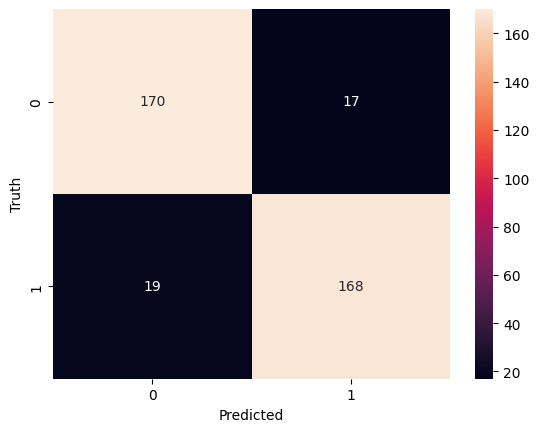

In [51]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [52]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       187
           1       0.91      0.90      0.90       187

    accuracy                           0.90       374
   macro avg       0.90      0.90      0.90       374
weighted avg       0.90      0.90      0.90       374



In [53]:
reviews = [
    "hurry up! buy insurance policy with 30% discount with yearly subscription",
    "I am coming to your home tonight"
]

In [54]:
model.predict(reviews)

1/1 [==============================] - 1s 663ms/step


array([[0.51052684],
       [0.12114938]], dtype=float32)